In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [2]:
df = pd.read_csv('survey_results_public.csv')
df_schema = pd.read_csv('survey_results_schema.csv')

In [3]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [8]:
df.LanguageWorkedWith.to_csv('data.csv')

In [9]:
import csv
from collections import Counter

In [18]:
with open('data.csv') as file:
    csv_reader = csv.DictReader(file)
    count_lang = Counter()
    for row in csv_reader:
        count_lang.update(row['LanguageWorkedWith'].split(';'))

In [19]:
count_lang

Counter({'HTML/CSS': 55466,
         'Java': 35917,
         'JavaScript': 59219,
         'Python': 36443,
         'C++': 20524,
         'C': 18017,
         'C#': 27097,
         'SQL': 47544,
         'VBA': 4781,
         'R': 5048,
         'Bash/Shell/PowerShell': 31991,
         'Ruby': 7331,
         'Rust': 2794,
         'TypeScript': 18523,
         'WebAssembly': 1015,
         'Other(s):': 7920,
         'Go': 7201,
         'PHP': 23030,
         'Assembly': 5833,
         'Kotlin': 5620,
         'Swift': 5744,
         '': 1314,
         'Objective-C': 4191,
         'Elixir': 1260,
         'Erlang': 777,
         'Clojure': 1254,
         'F#': 973,
         'Scala': 3309,
         'Dart': 1683})

In [20]:
count_lang.most_common(15)

[('JavaScript', 59219),
 ('HTML/CSS', 55466),
 ('SQL', 47544),
 ('Python', 36443),
 ('Java', 35917),
 ('Bash/Shell/PowerShell', 31991),
 ('C#', 27097),
 ('PHP', 23030),
 ('C++', 20524),
 ('TypeScript', 18523),
 ('C', 18017),
 ('Other(s):', 7920),
 ('Ruby', 7331),
 ('Go', 7201),
 ('Assembly', 5833)]

In [23]:
languages = []
popularity = []

for item in count_lang.most_common(15):
    languages.append(item[0])
    popularity.append(item[1])

In [24]:
languages

['JavaScript',
 'HTML/CSS',
 'SQL',
 'Python',
 'Java',
 'Bash/Shell/PowerShell',
 'C#',
 'PHP',
 'C++',
 'TypeScript',
 'C',
 'Other(s):',
 'Ruby',
 'Go',
 'Assembly']

In [25]:
popularity

[59219,
 55466,
 47544,
 36443,
 35917,
 31991,
 27097,
 23030,
 20524,
 18523,
 18017,
 7920,
 7331,
 7201,
 5833]

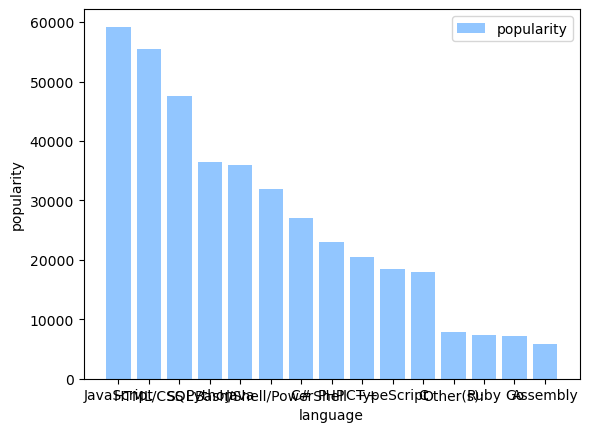

In [32]:
plt.style.use('seaborn-pastel')
plt.bar(languages, popularity, label='popularity')
plt.xlabel('language')
plt.ylabel('popularity')
plt.legend(loc='best')
plt.show()

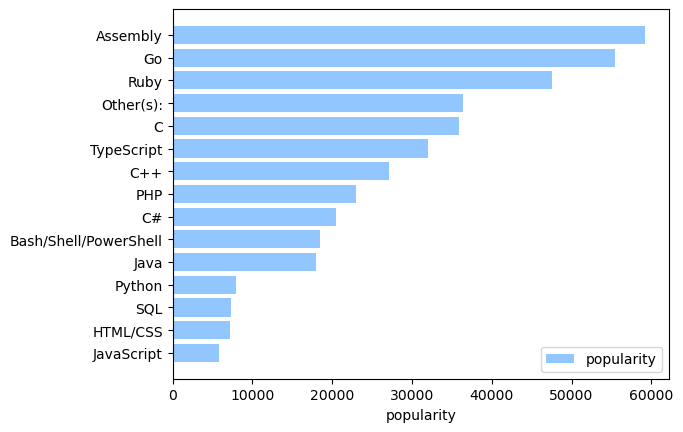

In [37]:
plt.style.use('seaborn-pastel')
plt.barh(languages[::-1], popularity[::-1], label='popularity')
plt.xlabel('popularity')
plt.xticks()
plt.legend(loc='best')
plt.show()

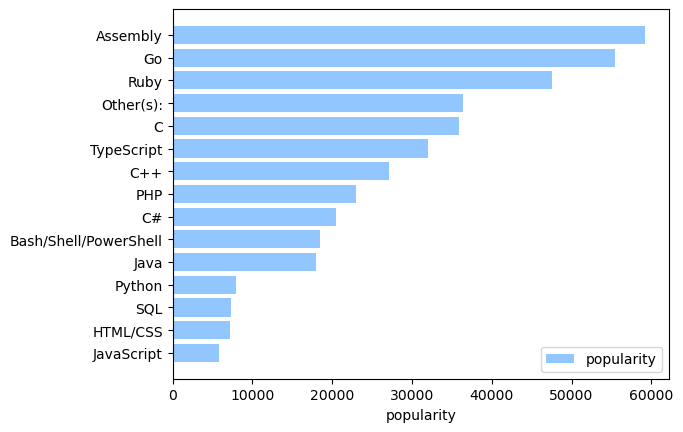

In [38]:
languages.reverse()
popularity.reverse()

plt.style.use('seaborn-pastel')
plt.barh(languages, popularity, label='popularity')
plt.xlabel('popularity')
plt.xticks()
plt.legend(loc='best')
plt.show()

In [40]:
df = pd.read_csv('data.csv')

In [41]:
df.head(3)

,Unnamed: 0,LanguageWorkedWith
0,0,HTML/CSS;Java;JavaScript;Python
1,1,C++;HTML/CSS;Python
2,2,HTML/CSS


In [45]:
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

In [46]:
df.head(3)

,id,LanguageWorkedWith
0,0,HTML/CSS;Java;JavaScript;Python
1,1,C++;HTML/CSS;Python
2,2,HTML/CSS


In [65]:
languages = df.loc[:5, 'LanguageWorkedWith']
ids = df['id']

In [66]:
lang_count = Counter()
for x in languages:
    lang_count.update(x.split(';'))

In [67]:
languages.dtypes

dtype('O')

In [68]:
type(languages[0])

str

In [69]:
lang_count

Counter({'HTML/CSS': 4,
         'Java': 3,
         'JavaScript': 2,
         'Python': 4,
         'C++': 3,
         'C': 1,
         'C#': 1,
         'SQL': 3,
         'VBA': 1,
         'R': 1})

In [75]:
df.loc[:,'LanguageWorkedWith'].str.split(';', expand=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,HTML/CSS,Java,JavaScript,Python,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,C++,HTML/CSS,Python,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,HTML/CSS,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,C,C++,C#,Python,SQL,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,C++,HTML/CSS,Java,JavaScript,Python,SQL,VBA,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88878,HTML/CSS,JavaScript,Other(s):,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
88879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
c = Counter()

for x in df.loc[:5,'LanguageWorkedWith'].str.split(';'):
    c.update(x)

In [79]:
c

Counter({'HTML/CSS': 4,
         'Java': 3,
         'JavaScript': 2,
         'Python': 4,
         'C++': 3,
         'C': 1,
         'C#': 1,
         'SQL': 3,
         'VBA': 1,
         'R': 1})

In [80]:
df.loc[:5,'LanguageWorkedWith'].str.split(';').value_counts()

[HTML/CSS, Java, JavaScript, Python]                   1
[C++, HTML/CSS, Python]                                1
[HTML/CSS]                                             1
[C, C++, C#, Python, SQL]                              1
[C++, HTML/CSS, Java, JavaScript, Python, SQL, VBA]    1
[Java, R, SQL]                                         1
Name: LanguageWorkedWith, dtype: int64

In [81]:
df.loc[:5,'LanguageWorkedWith'].str.contains('Python')

0     True
1     True
2    False
3     True
4     True
5    False
Name: LanguageWorkedWith, dtype: bool

In [82]:
l = ['Python', 'JavaScript']
df.loc[:5,'LanguageWorkedWith'].isin(l)

0    False
1    False
2    False
3    False
4    False
5    False
Name: LanguageWorkedWith, dtype: bool

In [86]:
df.loc[:,'LanguageWorkedWith'].str.split(';')

0                     [HTML/CSS, Java, JavaScript, Python]
1                                  [C++, HTML/CSS, Python]
2                                               [HTML/CSS]
3                                [C, C++, C#, Python, SQL]
4        [C++, HTML/CSS, Java, JavaScript, Python, SQL,...
                               ...                        
88878                    [HTML/CSS, JavaScript, Other(s):]
88879                                                  NaN
88880                                                  NaN
88881                                                  NaN
88882    [Bash/Shell/PowerShell, HTML/CSS, Java, JavaSc...
Name: LanguageWorkedWith, Length: 88883, dtype: object

In [89]:
df.loc[:,'LanguageWorkedWith'].str.split(';').explode().value_counts().head(15)

JavaScript               59219
HTML/CSS                 55466
SQL                      47544
Python                   36443
Java                     35917
Bash/Shell/PowerShell    31991
C#                       27097
PHP                      23030
C++                      20524
TypeScript               18523
C                        18017
Other(s):                 7920
Ruby                      7331
Go                        7201
Assembly                  5833
Name: LanguageWorkedWith, dtype: int64

In [90]:
df.loc[:,'LanguageWorkedWith'].str.split(';').explode().value_counts(normalize=True).head(15)

JavaScript               0.134434
HTML/CSS                 0.125915
SQL                      0.107931
Python                   0.082730
Java                     0.081536
Bash/Shell/PowerShell    0.072623
C#                       0.061513
PHP                      0.052281
C++                      0.046592
TypeScript               0.042049
C                        0.040901
Other(s):                0.017979
Ruby                     0.016642
Go                       0.016347
Assembly                 0.013242
Name: LanguageWorkedWith, dtype: float64

In [92]:
type(df.loc[:,'LanguageWorkedWith'].str.split(';').explode().value_counts().head(15))

pandas.core.series.Series

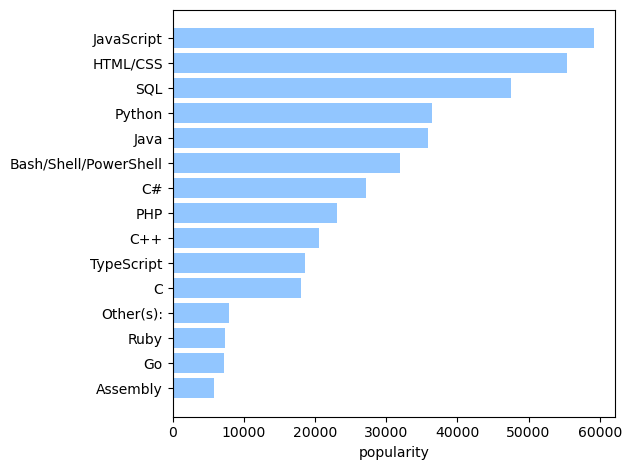

In [135]:
d = df.loc[:,'LanguageWorkedWith'].str.split(';').explode().value_counts().head(15)
d.sort_values(ascending=True, inplace=True)

plt.style.use('seaborn-pastel')
plt.barh(d.index, d.values)
plt.xlabel('popularity')
plt.tight_layout()
plt.show()

In [114]:
d.values

array([ 5833,  7201,  7331,  7920, 18017, 18523, 20524, 23030, 27097,
       31991, 35917, 36443, 47544, 55466, 59219])

In [136]:
lst = []
for i in d.values:
    lst.append(str(i/1000) + 'K')

In [137]:
lst

['5.833K',
 '7.201K',
 '7.331K',
 '7.92K',
 '18.017K',
 '18.523K',
 '20.524K',
 '23.03K',
 '27.097K',
 '31.991K',
 '35.917K',
 '36.443K',
 '47.544K',
 '55.466K',
 '59.219K']

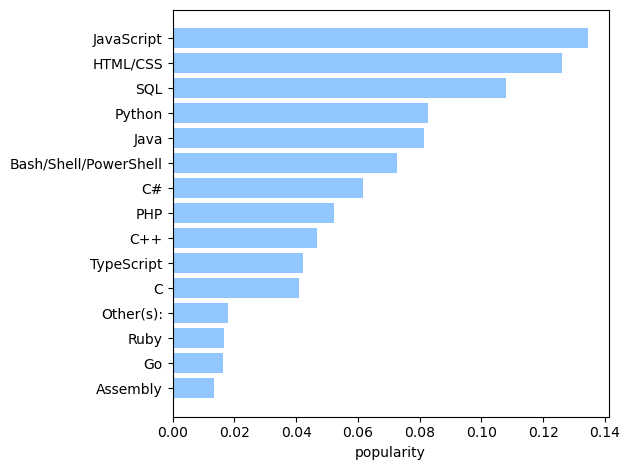

In [140]:
d = df.loc[:,'LanguageWorkedWith'].str.split(';').explode().value_counts(normalize=True).head(15)
d.sort_values(ascending=True, inplace=True)

plt.style.use('seaborn-pastel')
plt.barh(d.index, d.values)
plt.xlabel('popularity')
plt.tight_layout()
plt.show()

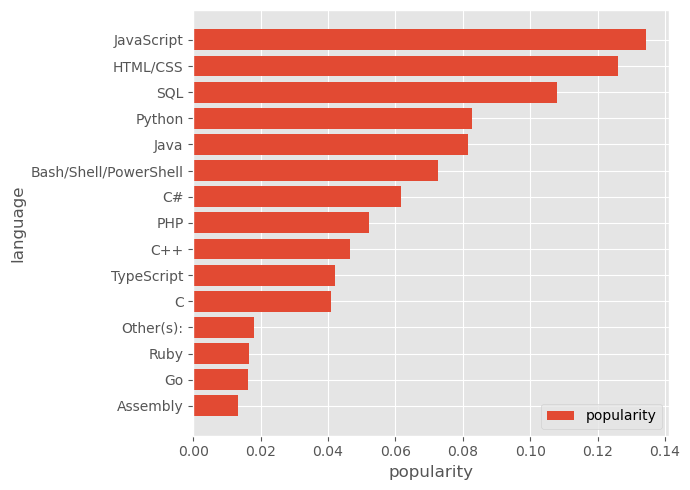

In [176]:
plt.style.use('ggplot')
fig, ax = plt.subplots(1, 1, figsize=(7,5), layout='tight')
ax.barh(d.index, d.values, label='popularity')
ax.set_xlabel('popularity')
ax.set_ylabel('language')
ax.legend(loc='best')
plt.show()

In [177]:
ax.get_xticklabels()

[Text(0.0, 0, '0.00'),
 Text(0.02, 0, '0.02'),
 Text(0.04, 0, '0.04'),
 Text(0.06, 0, '0.06'),
 Text(0.08, 0, '0.08'),
 Text(0.1, 0, '0.10'),
 Text(0.12, 0, '0.12'),
 Text(0.14, 0, '0.14'),
 Text(0.16, 0, '0.16')]

In [178]:
[i.get_text() for i in ax.get_xticklabels()]

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16']

In [179]:
[i.get_text() for i in ax.get_xticklabels()]

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16']

In [180]:
float(ax.get_xticklabels()[0].get_text())

0.0

In [181]:
labs = [float(i.get_text()) for i in ax.get_xticklabels()]

In [182]:
labs

[0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16]

/tmp/ipykernel_11309/1809908868.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labs3)


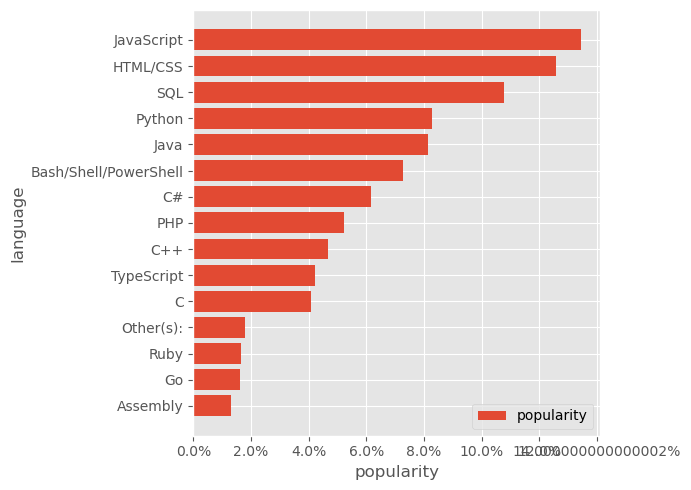

In [183]:
labs = [float(i.get_text()) for i in ax.get_xticklabels()]
labs2 = [x*100 for x in labs]
labs3 = [str(i)+'%' for i in labs2]

plt.style.use('ggplot')
fig, ax = plt.subplots(1, 1, figsize=(7,5), layout='tight')
ax.barh(d.index, d.values, label='popularity')
ax.set_xlabel('popularity')
ax.set_xticklabels(labs3)
ax.set_ylabel('language')
ax.legend(loc='best')
plt.show()

In [184]:
labs3

['0.0%',
 '2.0%',
 '4.0%',
 '6.0%',
 '8.0%',
 '10.0%',
 '12.0%',
 '14.000000000000002%',
 '16.0%']

In [185]:
pd.options.display.float_format = '{:.1f}'.format

In [186]:
labs2

[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.000000000000002, 16.0]